# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [75]:
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt



# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [3]:
# Run this code:

fifa = pd.read_csv('fifa.csv')

Let's examine the dataset by looking at the `head`.

In [4]:
# Your code here:
fifa.head()


,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0


Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [46]:
fifa["ValueNumeric"] = fifa.Value.str.extract('(\d+)', expand=False).astype("int")
fifa["ValueNumeric"]

0        110
1         77
2        118
3         72
4        102
        ... 
18202     60
18203     60
18204     60
18205     60
18206     60
Name: ValueNumeric, Length: 18207, dtype: int64

#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [47]:
from statsmodels.formula.api import ols

#Hipótesis nula, la posición y el pie preferido tienen efecto en el valor del jugador
#Hipótesis alternativa, la posición y el pie preferido no tienen efecto

# Cambiar el nombre de la columna Preferred foot
fifa = fifa.rename(columns={"Preferred Foot": "Preferred_foot"})

In [78]:
# Crear el modelo OLS
value_ols = ols('ValueNumeric ~ C(Position)*C(Preferred_foot)', data=fifa).fit()
# Crear la tabla
table = sm.stats.anova_lm(value_ols, typ=2)
table

,sum_sq,df,F,PR(>F)
C(Position),8.781574e+06,26.0,4.037146,2.070364e-11
C(Preferred_foot),7.258024e+04,1.0,0.867549,3.516473e-01
C(Position):C(Preferred_foot),3.055200e+06,26.0,1.404564,8.274739e-02
Residual,1.513684e+09,18093.0,NaN,NaN


What is your conclusion from this ANOVA?

*Tanto para la posición como para el pie preferido, los p-values son menores a 0.05, por tanto se rechaza la H0*


After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [55]:
# Your code here:
#Hipótesis nula, la nacionalidad tiene efecto en el valor del jugador
#Hipótesis alternativa, la nacionalidad no tienen efecto

# Crear el modelo OLS
nationality_ols = ols('ValueNumeric ~ C(Nationality)', data=fifa).fit()
# Crear la tabla
table = sm.stats.anova_lm(nationality_ols, typ=2)
table


,sum_sq,df,F,PR(>F)
C(Nationality),4.299134e+07,163.0,3.20523,1.747201e-38
Residual,1.484715e+09,18043.0,NaN,NaN


What is your conclusion from this ANOVA?

*El p-value es menor a 0.05, por tanto, se rechaza la H0*.

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [60]:
# Buscar nulos
nulos = (fifa.isnull().sum()).sort_values(ascending=False)
nulos

Club              241
Position           60
Acceleration       48
SprintSpeed        48
Preferred_foot     48
Weak Foot          48
Penalties          48
Stamina            48
Strength           48
LongShots          48
Aggression         48
Interceptions      48
Positioning        48
Vision             48
Overall             0
Age                 0
Nationality         0
ValueNumeric        0
Potential           0
Value               0
Name                0
dtype: int64

In [62]:
# Eliminar filas con NAs:
fifa_cl = fifa.dropna(axis=0)

# Comprobar que fue bien:
(fifa_cl.isnull().sum()).sort_values(ascending=False)

ValueNumeric      0
Weak Foot         0
Age               0
Nationality       0
Overall           0
Potential         0
Club              0
Value             0
Preferred_foot    0
Position          0
Acceleration      0
Penalties         0
SprintSpeed       0
Stamina           0
Strength          0
LongShots         0
Aggression        0
Interceptions     0
Positioning       0
Vision            0
Name              0
dtype: int64

Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [64]:
# Variables predictoras 
X = sm.add_constant(fifa_cl[['Stamina', 'SprintSpeed']])

# Variable a predecir
Y = fifa_cl.ValueNumeric

# Crear el modelo
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

# See the model summary
model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ValueNumeric   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.498
Date:                Wed, 29 Apr 2020   Prob (F-statistic):             0.0111
Time:                        19:17:58   Log-Likelihood:            -1.2703e+05
No. Observations:               17918   AIC:                         2.541e+05
Df Residuals:                   17915   BIC:                         2.541e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         280.4959     10.394     26.987      0.000     260.123     300.869
Stamina        -0.5199      0.174     -2.992      0.003      -0.861      -0.179
SprintSpeed     0.3182      0.188      1.690      0.091      -0.051       0.687
==============================================================================
Omnibus:                     2099.331   Durbin-Watson:                   0.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2256.726
Skew:                           0.818   Prob(JB):                         0.00
Kurtosis:                       2.412   Cond. No.                         444.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

*El valor de F-statistic prueba junto con su p-value si se debe rechazar la hipótesis nula de que el modelo se ajusta mejor cuando no tiene variables independientes. Como su p-value =0.01 < 0.05 nos llevan a rechazar la hipótesis nula. Por tanto, añadirle variables mejoraría su capacidad predictiva.*

*El valor de R2 es una medida de cómo de bien el modelo se ajusta a los datos y qué porcentaje de la varianza es capaz de explicar. En este caso, el modelo no se ajusta nada a nuestros datos.*



Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [65]:
# Variables predictoras 
X = sm.add_constant(fifa_cl[['Potential']])

# Variable a predecir
Y = fifa_cl.ValueNumeric

# Crear el modelo
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

# See the model summary
model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ValueNumeric   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     1056.
Date:                Wed, 29 Apr 2020   Prob (F-statistic):          3.17e-225
Time:                        20:08:12   Log-Likelihood:            -1.2652e+05
No. Observations:               17918   AIC:                         2.530e+05
Df Residuals:                   17916   BIC:                         2.531e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1063.4157     24.555     43.307      0.000    1015.285    1111.547
Potential    -11.1481      0.343    -32.503      0.000     -11.820     -10.476
==============================================================================
Omnibus:                     2017.022   Durbin-Watson:                   1.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2746.365
Skew:                           0.953   Prob(JB):                         0.00
Kurtosis:                       2.779   Cond. No.                         834.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

*En este caso, también se rechaza la hipótesis nula*
*El R2 es muy bajo, por lo que apenas explica la varianza del modelo*



Plot a scatter plot of value vs. potential. Do you see a linear relationship?

Text(0, 0.5, 'Potential')

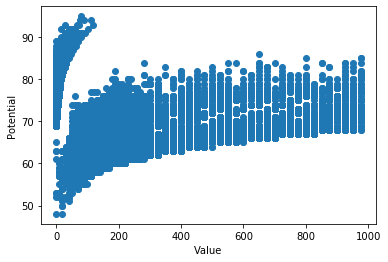

In [77]:
plt.plot(fifa_cl.ValueNumeric, fifa_cl.Potential, 'o')
plt.xlabel("Value")
plt.ylabel("Potential")


*Más que una relación lineal, parece una relación exponencial*